# ETAPA 2: Análise do Perfil dos Respondentes

## Consulta à Comunidade UFPE sobre o Uso de Inteligência Artificial

---

**Objetivo:** Caracterizar a amostra e avaliar sua representatividade.

**Variáveis analisadas:**
- Vínculo com a UFPE (Discente Graduação, Discente Pós, Docente, Técnico, Egresso)
- Centro/Unidade Acadêmica (34 categorias)
- Curso (para discentes)

**Procedimentos:**
1. Calcular distribuição de frequências absolutas e relativas por vínculo
2. Calcular distribuição por Centro/Unidade
3. Gerar tabelas cruzadas (vínculo × centro)
4. Comparar proporções da amostra com dados institucionais da UFPE (se disponíveis)
5. Analisar distribuição temporal das respostas ao longo do período de coleta

**Produto:** Tabelas e gráficos de caracterização da amostra; análise de representatividade.

**Critério de Validação:** Coerência com dados institucionais e cobertura de todas as unidades acadêmicas.

---

## Requisitos Técnicos

### Kernel Python
- **Python:** 3.9 ou superior
- **Kernel recomendado:** `python3` ou ambiente virtual com as dependências instaladas

### Dados de Entrada

| Arquivo | Descrição | Origem |
|---------|-----------|--------|
| `dados_limpos_etapa1.xlsx` | Base de dados limpa com 2.164 registros | Etapa 1 |

### Dados de Saída

| Arquivo | Descrição |
|---------|----------|
| `perfil_respondentes_etapa2.xlsx` | Tabelas de frequência e cruzamentos |
| `graficos_perfil_etapa2.png` | Visualizações do perfil da amostra |
| `relatorio_perfil_etapa2.md` | Relatório descritivo da caracterização |

---

## 1. Instalação de Dependências

In [1]:
# ============================================================================
# INSTALAÇÃO DE DEPENDÊNCIAS
# Execute esta célula apenas uma vez para instalar os pacotes necessários
# ============================================================================

!pip install pandas openpyxl matplotlib seaborn numpy --quiet

print("✅ Dependências instaladas com sucesso!")

✅ Dependências instaladas com sucesso!


## 2. Configuração Inicial

In [2]:
# ============================================================================
# IMPORTAÇÃO DE BIBLIOTECAS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Configurações de visualização
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Verificar versões
print("Bibliotecas carregadas com sucesso!")
print(f"  • Pandas: {pd.__version__}")
print(f"  • Matplotlib: {plt.matplotlib.__version__}")
print(f"  • Seaborn: {sns.__version__}")

Bibliotecas carregadas com sucesso!
  • Pandas: 2.3.3
  • Matplotlib: 3.10.7
  • Seaborn: 0.13.2


In [3]:
# ============================================================================
# CONFIGURAÇÃO DE ARQUIVOS DE ENTRADA E SAÍDA
# ============================================================================

# Arquivo de entrada (gerado na Etapa 1)
ARQUIVO_ENTRADA = "data/dados_limpos_etapa1.xlsx"

# Arquivos de saída (serão usados nas próximas etapas)
ARQUIVO_SAIDA_EXCEL = "data/perfil_respondentes_etapa2.xlsx"
ARQUIVO_SAIDA_GRAFICOS = "data/graficos_perfil_etapa2.png"
ARQUIVO_SAIDA_RELATORIO = "data/relatorio_perfil_etapa2.md"

print("Configuração de arquivos:")
print(f"  📥 Entrada: {ARQUIVO_ENTRADA}")
print(f"  📤 Saídas:  {ARQUIVO_SAIDA_EXCEL}")
print(f"            {ARQUIVO_SAIDA_GRAFICOS}")
print(f"            {ARQUIVO_SAIDA_RELATORIO}")

Configuração de arquivos:
  📥 Entrada: data/dados_limpos_etapa1.xlsx
  📤 Saídas:  data/perfil_respondentes_etapa2.xlsx
            data/graficos_perfil_etapa2.png
            data/relatorio_perfil_etapa2.md


## 3. Carregamento dos Dados

In [4]:
# Carregar dados limpos da Etapa 1
try:
    df = pd.read_excel(ARQUIVO_ENTRADA)
    print(f"✅ Dados carregados com sucesso!")
    print(f"   Registros: {len(df)}")
    print(f"   Variáveis: {len(df.columns)}")
except FileNotFoundError:
    print(f"❌ ERRO: Arquivo '{ARQUIVO_ENTRADA}' não encontrado!")
    print(f"   Certifique-se de que a Etapa 1 foi executada e o arquivo está no diretório correto.")
    raise

✅ Dados carregados com sucesso!
   Registros: 2164
   Variáveis: 24


In [5]:
# Verificar estrutura dos dados
print("Colunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")

Colunas disponíveis:
   1. Timestamp
   2. Consentimento
   3. Vinculo_Original
   4. Centro_Unidade
   5. Curso
   6. Frequencia_Uso_IA
   7. Contextos_Uso
   8. Beneficios_Percebidos
   9. Riscos_Preocupacoes
  10. Tipo_Uso
  11. Likert_IA_Realidade
  12. Likert_Diretrizes_Eticas
  13. Likert_Diretrizes_Avaliacoes
  14. Likert_Incentivo_IA
  15. Likert_Debates_Impactos
  16. Impacto_Producao_Autoral
  17. Impacto_Integridade_Academica
  18. Medidas_Uso_Etico
  19. Temas_Prioritarios
  20. Estrutura_Governanca
  21. Preparacao_Uso_Etico
  22. Tipos_Formacao
  23. Comentarios_Finais
  24. Vinculo_Padronizado


In [6]:
# Visualizar primeiras linhas
df.head(3)

,Timestamp,Consentimento,Vinculo_Original,Centro_Unidade,Curso,Frequencia_Uso_IA,Contextos_Uso,Beneficios_Percebidos,Riscos_Preocupacoes,Tipo_Uso,Likert_IA_Realidade,Likert_Diretrizes_Eticas,Likert_Diretrizes_Avaliacoes,Likert_Incentivo_IA,Likert_Debates_Impactos,Impacto_Producao_Autoral,Impacto_Integridade_Academica,Medidas_Uso_Etico,Temas_Prioritarios,Estrutura_Governanca,Preparacao_Uso_Etico,Tipos_Formacao,Comentarios_Finais,Vinculo_Padronizado
0,2025-11-11 00:21:21.013,"Sim, concordo em participar",Docente,CCS - Centro de Ciências da Saúde,NaN,"Sim, frequentemente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem, ...",Otimização do trabalho e qualificação das realizações. Otimização de tempo das tarefas e ganho d...,"Utilização incompetente da ferramenta. Subordinação às suas conclusões, por baixa capacidade crí...",Pago (assinaturas ou créditos),Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Na ampliação da capacidade de trabalho pela realização de tarefas anteriormente incapazes de ser...,"Penso que a criação não autoral de conteúdos, sem a devida crítica, se tornará cada vez mais fre...",Programas de educação continuada sobre a potencialização do uso da IA; sobre os tipos de conduta...,"Uso de IA no ensino e na avaliação, Pesquisa científica com IA, Ética e integridade acadêmica, U...",Criação de uma comissão que dinamize uma política institucional de IA. Criação de conteúdos de a...,Sim,"Oficinas práticas sobre ferramentas de IA, Apoio técnico na elaboração de projetos, Espaços de d...",A UFPE deve pensar e viabilizar a democratização de acesso às melhores ferramentas de IA.,Docente
1,2025-11-11 07:56:42.679,"Sim, concordo em participar",Docente,CCJ - Centro de Ciências Jurídicas,NaN,"Sim, frequentemente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem","Facilita estruturar apresentações, questionários para pesquisa, organizar aulas, analisar dados,...","Dependência tecnológica, impacto no trabalho, impacto ambiental, raciocínio",Gratuito (versões abertas) por exemplo versões free,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Motivando não raciocínio inteligente. As pessoas buscam titulação e não aprendizagem. A IA facil...,a IA exige repensar a avaliação. Se o docente reduz a importância de seu ensino a reproduzir o q...,Construir uma massa crítica sobre o tema na UFPE reduzindo a desinformação. Promover cursos de f...,"Uso de IA no ensino e na avaliação, Pesquisa científica com IA, Ética e integridade acadêmica, P...","Assumindo o protagonismo da desmistificaçao do uso de IA, fomentando debate amplo e aberto de to...",Sim,"Oficinas práticas sobre ferramentas de IA, Cursos sobre ética e regulamentação, Guias e tutoriai...",NaN,Docente
2,2025-11-11 08:55:25.101,"Sim, concordo em participar",Docente,CE - Centro de Educação,NaN,"Sim, ocasionalmente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem, ...",Apoio no desenvolvimento de atividades acadêmicas,Desconhecimento do uso adequado o que gera resultados negativos na resposta,Ambos,Concordo,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,O uso irresponsável Da IA na produção de material pode gerar produtos não confiáveis.,Desinformação e evidencias falsas,Criar politica interna,"Uso de IA no ensino e na avaliação, Pesquisa científica com IA, Ética e integridade acadêmica, P...",Observatório de IA,Parcialmente,"Oficinas práticas sobre ferramentas de IA, Cursos sobre ética e regulamentação, Guias e tutoriai...",NaN,Docente


---

## 4. Análise por Vínculo Institucional

### 4.1 Distribuição de Frequências

In [7]:
# Calcular frequências absolutas e relativas por vínculo
freq_vinculo = df['Vinculo_Padronizado'].value_counts().reset_index()
freq_vinculo.columns = ['Vínculo', 'Frequência']
freq_vinculo['Percentual'] = (freq_vinculo['Frequência'] / freq_vinculo['Frequência'].sum() * 100).round(1)
freq_vinculo['Percentual_Acum'] = freq_vinculo['Percentual'].cumsum().round(1)

# Adicionar linha de total
total_row = pd.DataFrame([{
    'Vínculo': 'TOTAL',
    'Frequência': freq_vinculo['Frequência'].sum(),
    'Percentual': 100.0,
    'Percentual_Acum': '-'
}])
freq_vinculo_display = pd.concat([freq_vinculo, total_row], ignore_index=True)

print("=" * 60)
print("DISTRIBUIÇÃO POR VÍNCULO INSTITUCIONAL")
print("=" * 60)
print(freq_vinculo_display.to_string(index=False))

DISTRIBUIÇÃO POR VÍNCULO INSTITUCIONAL
                  Vínculo  Frequência  Percentual Percentual_Acum
    Discente de Graduação         792        36.6            36.6
                  Docente         555        25.6            62.2
Discente de Pós-Graduação         468        21.6            83.8
   Técnico-administrativo         310        14.3            98.1
                  Egresso          39         1.8            99.9
                    TOTAL        2164       100.0               -


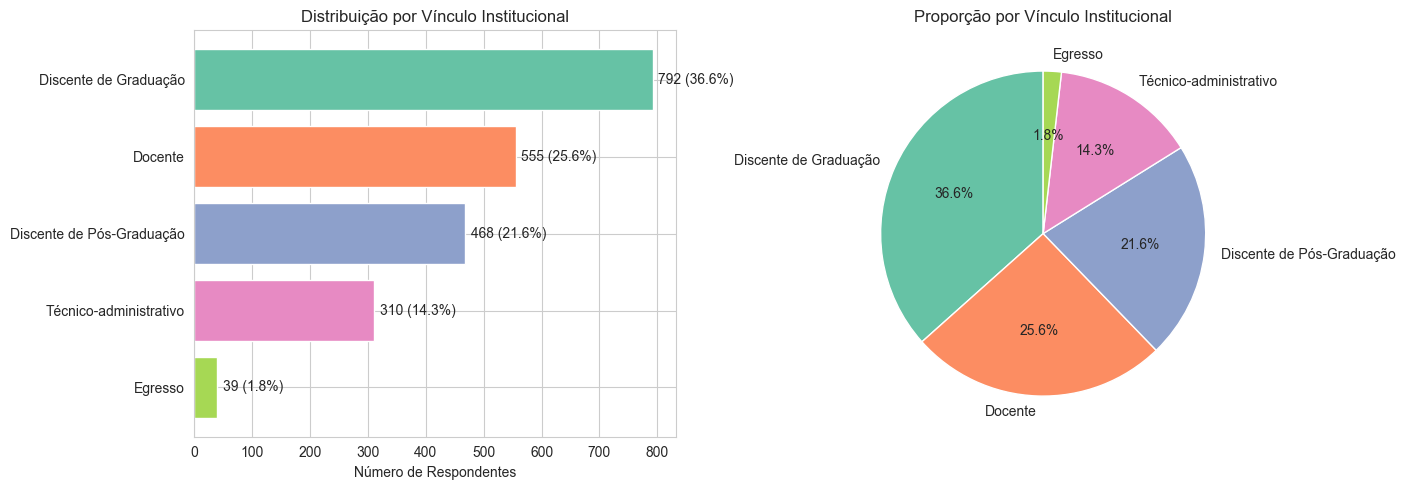


Gráfico salvo como: grafico_vinculo_etapa2.png


In [8]:
# Gráfico de barras - Vínculo Institucional
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
cores = sns.color_palette("Set2", n_colors=len(freq_vinculo))
bars = axes[0].barh(freq_vinculo['Vínculo'], freq_vinculo['Frequência'], color=cores)
axes[0].set_xlabel('Número de Respondentes')
axes[0].set_title('Distribuição por Vínculo Institucional')
axes[0].invert_yaxis()

# Adicionar labels nas barras
for bar, freq, pct in zip(bars, freq_vinculo['Frequência'], freq_vinculo['Percentual']):
    axes[0].text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, 
                 f'{freq} ({pct}%)', va='center', fontsize=10)

# Gráfico de pizza
axes[1].pie(freq_vinculo['Frequência'], labels=freq_vinculo['Vínculo'], 
            autopct='%1.1f%%', colors=cores, startangle=90)
axes[1].set_title('Proporção por Vínculo Institucional')

plt.tight_layout()
plt.savefig('grafico_vinculo_etapa2.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_vinculo_etapa2.png")

---

## 5. Análise por Centro/Unidade Acadêmica

### 5.1 Distribuição de Frequências

In [9]:
# Calcular frequências por Centro/Unidade
freq_centro = df['Centro_Unidade'].value_counts().reset_index()
freq_centro.columns = ['Centro/Unidade', 'Frequência']
freq_centro['Percentual'] = (freq_centro['Frequência'] / freq_centro['Frequência'].sum() * 100).round(1)
freq_centro['Percentual_Acum'] = freq_centro['Percentual'].cumsum().round(1)

print("=" * 80)
print("DISTRIBUIÇÃO POR CENTRO/UNIDADE ACADÊMICA")
print("=" * 80)
print(freq_centro.to_string(index=False))
print(f"\nTotal de Centros/Unidades: {len(freq_centro)}")

DISTRIBUIÇÃO POR CENTRO/UNIDADE ACADÊMICA
                                                 Centro/Unidade  Frequência  Percentual  Percentual_Acum
                            CAC - Centro de Artes e Comunicação         285        13.2             13.2
                       CTG - Centro de Tecnologia e Geociências         268        12.4             25.6
                              CAA - Centro Acadêmico do Agreste         245        11.3             36.9
                  CFCH - Centro de Filosofia e Ciências Humanas         192         8.9             45.8
                    CCSA - Centro de Ciências Sociais Aplicadas         184         8.5             54.3
                              CCS - Centro de Ciências da Saúde         167         7.7             62.0
                                     CB - Centro de Biociências         140         6.5             68.5
                                        CE - Centro de Educação         103         4.8             73.3
             

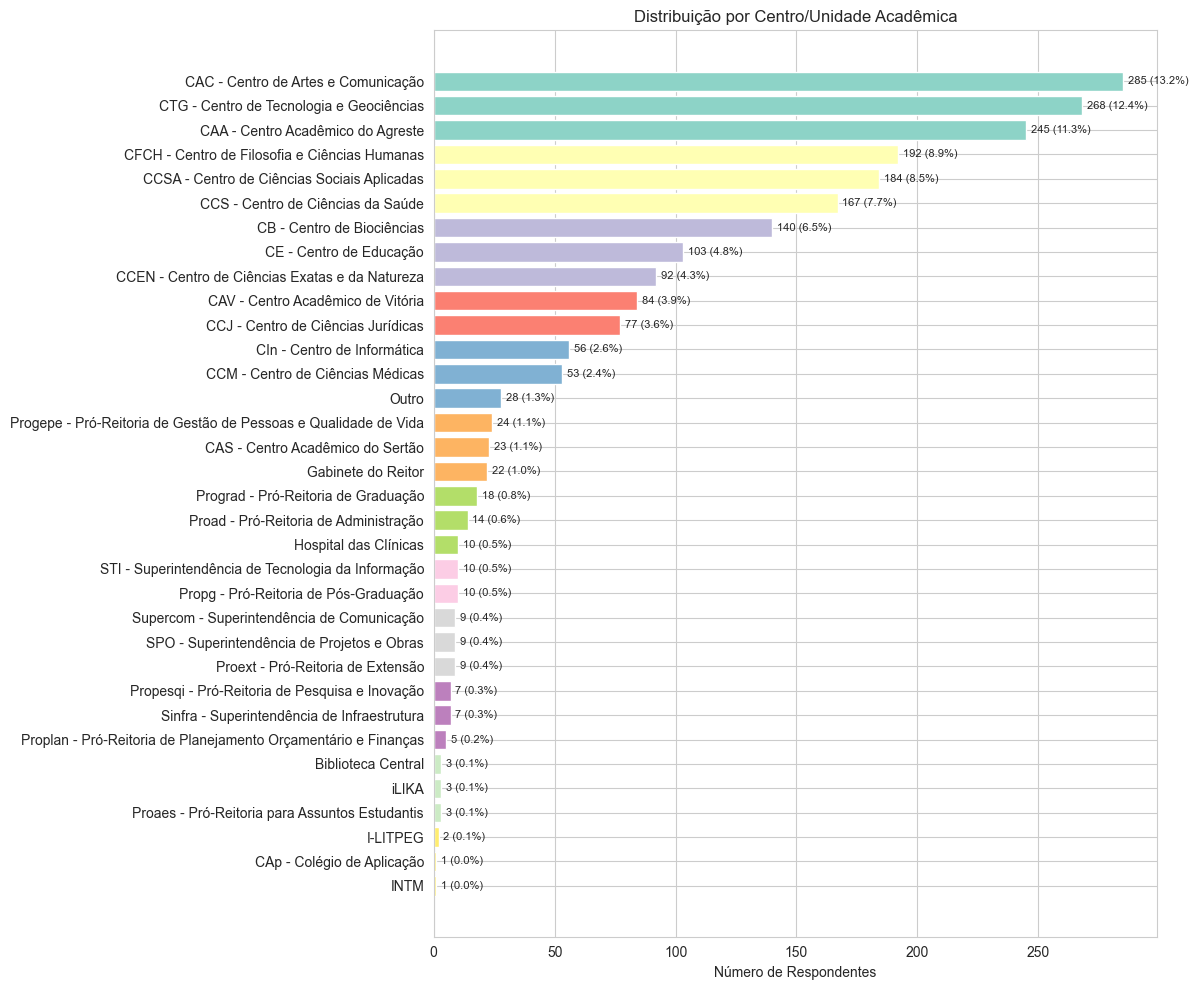


Gráfico salvo como: grafico_centro_etapa2.png


In [10]:
# Gráfico de barras horizontais - Centro/Unidade
fig, ax = plt.subplots(figsize=(12, 10))

cores = plt.cm.Set3(np.linspace(0, 1, len(freq_centro)))
bars = ax.barh(freq_centro['Centro/Unidade'], freq_centro['Frequência'], color=cores)
ax.set_xlabel('Número de Respondentes')
ax.set_title('Distribuição por Centro/Unidade Acadêmica')
ax.invert_yaxis()

# Adicionar labels nas barras
for bar, freq, pct in zip(bars, freq_centro['Frequência'], freq_centro['Percentual']):
    ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, 
            f'{freq} ({pct}%)', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('grafico_centro_etapa2.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_centro_etapa2.png")

### 5.2 Agrupamento por Tipo de Unidade

In [11]:
# Classificar unidades por tipo
def classificar_unidade(unidade):
    if pd.isna(unidade):
        return 'Não informado'
    unidade = str(unidade).upper()
    if 'CAA' in unidade or 'CAV' in unidade or 'CAS' in unidade:
        return 'Campus Fora de Sede'
    elif 'PRO' in unidade or 'REITORIA' in unidade or 'GABINETE' in unidade:
        return 'Órgãos Administrativos'
    elif 'HOSPITAL' in unidade or 'HC' in unidade:
        return 'Hospital das Clínicas'
    elif 'OUTRO' in unidade:
        return 'Outros'
    else:
        return 'Centros Acadêmicos (Recife)'

df['Tipo_Unidade'] = df['Centro_Unidade'].apply(classificar_unidade)

# Frequência por tipo de unidade
freq_tipo_unidade = df['Tipo_Unidade'].value_counts().reset_index()
freq_tipo_unidade.columns = ['Tipo de Unidade', 'Frequência']
freq_tipo_unidade['Percentual'] = (freq_tipo_unidade['Frequência'] / freq_tipo_unidade['Frequência'].sum() * 100).round(1)

print("=" * 60)
print("DISTRIBUIÇÃO POR TIPO DE UNIDADE")
print("=" * 60)
print(freq_tipo_unidade.to_string(index=False))

DISTRIBUIÇÃO POR TIPO DE UNIDADE
            Tipo de Unidade  Frequência  Percentual
Centros Acadêmicos (Recife)        1523        70.4
        Campus Fora de Sede         492        22.7
     Órgãos Administrativos         121         5.6
                     Outros          28         1.3


---

## 6. Tabela Cruzada: Vínculo × Centro/Unidade

In [12]:
# Criar tabela cruzada
tabela_cruzada = pd.crosstab(
    df['Centro_Unidade'], 
    df['Vinculo_Padronizado'],
    margins=True,
    margins_name='Total'
)

# Ordenar por total decrescente (excluindo a linha Total)
tabela_cruzada = tabela_cruzada.sort_values('Total', ascending=False)

print("=" * 100)
print("TABELA CRUZADA: CENTRO/UNIDADE × VÍNCULO INSTITUCIONAL")
print("=" * 100)
print(tabela_cruzada)

TABELA CRUZADA: CENTRO/UNIDADE × VÍNCULO INSTITUCIONAL
Vinculo_Padronizado                                              Discente de Graduação  \
Centro_Unidade                                                                           
Total                                                                              792   
CAC - Centro de Artes e Comunicação                                                120   
CTG - Centro de Tecnologia e Geociências                                            89   
CAA - Centro Acadêmico do Agreste                                                  114   
CFCH - Centro de Filosofia e Ciências Humanas                                       69   
CCSA - Centro de Ciências Sociais Aplicadas                                         96   
CCS - Centro de Ciências da Saúde                                                   62   
CB - Centro de Biociências                                                          33   
CE - Centro de Educação                      

In [13]:
# Tabela cruzada com percentuais por linha (distribuição do vínculo dentro de cada centro)
tabela_cruzada_pct = pd.crosstab(
    df['Centro_Unidade'], 
    df['Vinculo_Padronizado'],
    normalize='index'
) * 100

tabela_cruzada_pct = tabela_cruzada_pct.round(1)

print("\n" + "=" * 100)
print("TABELA CRUZADA (% POR LINHA - Distribuição do vínculo dentro de cada centro)")
print("=" * 100)
print(tabela_cruzada_pct)


TABELA CRUZADA (% POR LINHA - Distribuição do vínculo dentro de cada centro)
Vinculo_Padronizado                                              Discente de Graduação  \
Centro_Unidade                                                                           
Biblioteca Central                                                                 0.0   
CAA - Centro Acadêmico do Agreste                                                 46.5   
CAC - Centro de Artes e Comunicação                                               42.1   
CAS - Centro Acadêmico do Sertão                                                  65.2   
CAV - Centro Acadêmico de Vitória                                                 40.5   
CAp - Colégio de Aplicação                                                         0.0   
CB - Centro de Biociências                                                        23.6   
CCEN - Centro de Ciências Exatas e da Natureza                                    39.1   
CCJ - Centro de Ciênci

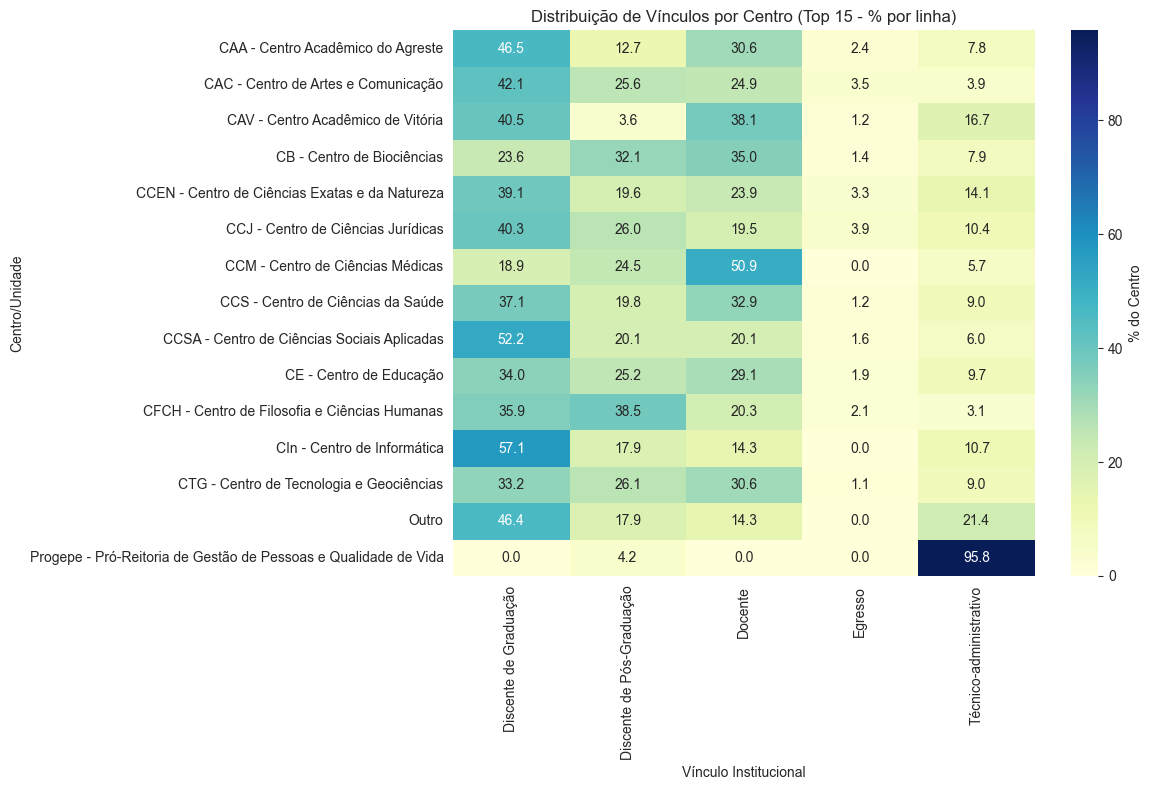


Gráfico salvo como: grafico_heatmap_etapa2.png


In [14]:
# Heatmap da tabela cruzada (top 15 centros)
top_centros = freq_centro.head(15)['Centro/Unidade'].tolist()
tabela_heatmap = tabela_cruzada_pct.loc[tabela_cruzada_pct.index.isin(top_centros)]

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(tabela_heatmap, annot=True, fmt='.1f', cmap='YlGnBu', 
            cbar_kws={'label': '% do Centro'}, ax=ax)
ax.set_title('Distribuição de Vínculos por Centro (Top 15 - % por linha)')
ax.set_xlabel('Vínculo Institucional')
ax.set_ylabel('Centro/Unidade')

plt.tight_layout()
plt.savefig('grafico_heatmap_etapa2.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_heatmap_etapa2.png")

---

## 7. Análise dos Cursos (Discentes)

In [15]:
# Filtrar apenas discentes que informaram o curso
df_discentes = df[df['Vinculo_Padronizado'].isin(['Discente de Graduação', 'Discente de Pós-Graduação'])].copy()
df_cursos = df_discentes[df_discentes['Curso'].notna()].copy()

print(f"Total de discentes: {len(df_discentes)}")
print(f"Discentes que informaram o curso: {len(df_cursos)} ({len(df_cursos)/len(df_discentes)*100:.1f}%)")
print(f"Cursos únicos mencionados: {df_cursos['Curso'].nunique()}")

Total de discentes: 1260
Discentes que informaram o curso: 1216 (96.5%)
Cursos únicos mencionados: 659


In [16]:
# Top 20 cursos mais frequentes
freq_cursos = df_cursos['Curso'].value_counts().head(20).reset_index()
freq_cursos.columns = ['Curso', 'Frequência']
freq_cursos['Percentual'] = (freq_cursos['Frequência'] / len(df_cursos) * 100).round(1)

print("=" * 70)
print("TOP 20 CURSOS MAIS FREQUENTES")
print("=" * 70)
print(freq_cursos.to_string(index=False))

TOP 20 CURSOS MAIS FREQUENTES
                   Curso  Frequência  Percentual
                  Design          26         2.1
               Pedagogia          23         1.9
                 Direito          23         1.9
           Administração          19         1.6
              Pedagogia           19         1.6
          Administração           16         1.3
      Ciências Contábeis          14         1.2
     Ciências Econômicas          13         1.1
                História          11         0.9
Engenharia da Computação          11         0.9
   Ciência da Computação          10         0.8
              Enfermagem           9         0.7
  Engenharia de Produção           9         0.7
         Biblioteconomia           9         0.7
                Medicina           8         0.7
    Gestão da Informação           8         0.7
   Engenharia Eletrônica           8         0.7
                Farmácia           8         0.7
        Engenharia Civil           8   

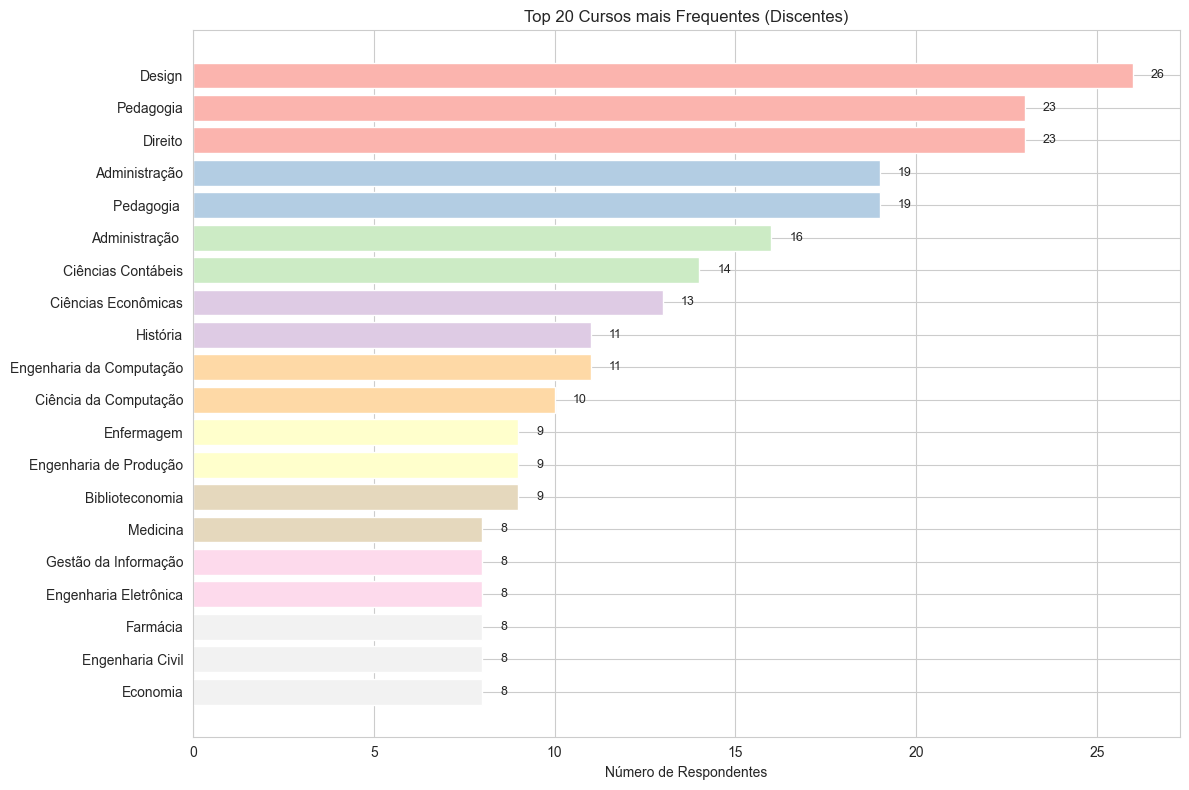


Gráfico salvo como: grafico_cursos_etapa2.png


In [17]:
# Gráfico dos top 20 cursos
fig, ax = plt.subplots(figsize=(12, 8))

cores = plt.cm.Pastel1(np.linspace(0, 1, len(freq_cursos)))
bars = ax.barh(freq_cursos['Curso'], freq_cursos['Frequência'], color=cores)
ax.set_xlabel('Número de Respondentes')
ax.set_title('Top 20 Cursos mais Frequentes (Discentes)')
ax.invert_yaxis()

for bar, freq in zip(bars, freq_cursos['Frequência']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{freq}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('grafico_cursos_etapa2.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_cursos_etapa2.png")

---

## 8. Análise Temporal das Respostas

In [18]:
# Converter timestamp para datetime se necessário
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extrair informações temporais
df['Data'] = df['Timestamp'].dt.date
df['Hora'] = df['Timestamp'].dt.hour
df['DiaSemana'] = df['Timestamp'].dt.day_name()

# Período de coleta
data_inicio = df['Timestamp'].min()
data_fim = df['Timestamp'].max()
duracao = (data_fim - data_inicio).days + 1

print("=" * 60)
print("PERÍODO DE COLETA")
print("=" * 60)
print(f"Data de início: {data_inicio.strftime('%d/%m/%Y %H:%M')}")
print(f"Data de término: {data_fim.strftime('%d/%m/%Y %H:%M')}")
print(f"Duração total: {duracao} dias")
print(f"Média de respostas por dia: {len(df)/duracao:.1f}")

PERÍODO DE COLETA
Data de início: 11/11/2025 00:21
Data de término: 01/12/2025 14:13
Duração total: 21 dias
Média de respostas por dia: 103.0


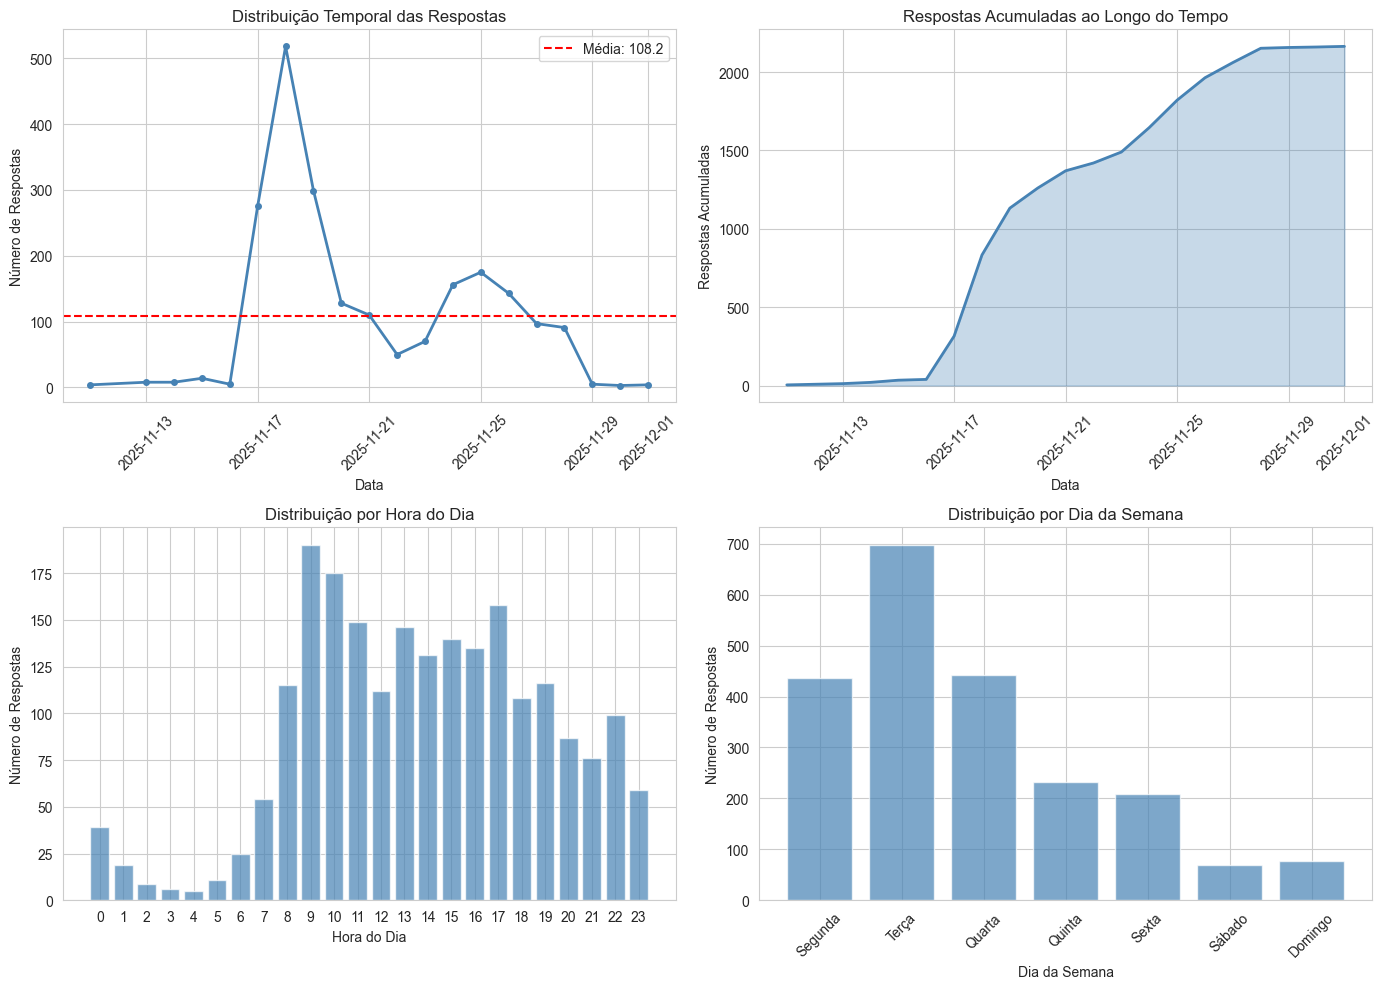


Gráfico salvo como: grafico_temporal_etapa2.png


In [19]:
# Distribuição de respostas por dia
respostas_por_dia = df.groupby('Data').size().reset_index(name='Respostas')
respostas_por_dia['Data'] = pd.to_datetime(respostas_por_dia['Data'])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Respostas por dia
axes[0, 0].plot(respostas_por_dia['Data'], respostas_por_dia['Respostas'], 
                marker='o', linewidth=2, markersize=4, color='steelblue')
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Número de Respostas')
axes[0, 0].set_title('Distribuição Temporal das Respostas')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].axhline(y=respostas_por_dia['Respostas'].mean(), color='red', 
                   linestyle='--', label=f'Média: {respostas_por_dia["Respostas"].mean():.1f}')
axes[0, 0].legend()

# Gráfico 2: Respostas acumuladas
respostas_por_dia['Acumulado'] = respostas_por_dia['Respostas'].cumsum()
axes[0, 1].fill_between(respostas_por_dia['Data'], respostas_por_dia['Acumulado'], 
                        alpha=0.3, color='steelblue')
axes[0, 1].plot(respostas_por_dia['Data'], respostas_por_dia['Acumulado'], 
                linewidth=2, color='steelblue')
axes[0, 1].set_xlabel('Data')
axes[0, 1].set_ylabel('Respostas Acumuladas')
axes[0, 1].set_title('Respostas Acumuladas ao Longo do Tempo')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Respostas por hora do dia
respostas_por_hora = df.groupby('Hora').size()
axes[1, 0].bar(respostas_por_hora.index, respostas_por_hora.values, color='steelblue', alpha=0.7)
axes[1, 0].set_xlabel('Hora do Dia')
axes[1, 0].set_ylabel('Número de Respostas')
axes[1, 0].set_title('Distribuição por Hora do Dia')
axes[1, 0].set_xticks(range(0, 24))

# Gráfico 4: Respostas por dia da semana
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nomes_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
respostas_por_diasemana = df['DiaSemana'].value_counts().reindex(ordem_dias)
axes[1, 1].bar(nomes_dias, respostas_por_diasemana.values, color='steelblue', alpha=0.7)
axes[1, 1].set_xlabel('Dia da Semana')
axes[1, 1].set_ylabel('Número de Respostas')
axes[1, 1].set_title('Distribuição por Dia da Semana')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('grafico_temporal_etapa2.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_temporal_etapa2.png")

---

## 9. Comparação com Dados Institucionais (Representatividade)

In [20]:
# ============================================================================
# DADOS INSTITUCIONAIS DA UFPE (aproximados - ajuste conforme dados oficiais)
# Fonte: Relatórios institucionais da UFPE (inserir dados reais quando disponíveis)
# ============================================================================

# Dados aproximados da comunidade UFPE (ajustar conforme dados oficiais)
dados_institucionais = {
    'Discente de Graduação': 30000,    # Aproximado
    'Discente de Pós-Graduação': 8000,  # Aproximado
    'Docente': 2800,                    # Aproximado
    'Técnico-administrativo': 3500,     # Aproximado
    'Egresso': None                     # Não disponível para comparação
}

# Criar tabela de comparação
comparacao = []
for vinculo, pop_total in dados_institucionais.items():
    n_amostra = len(df[df['Vinculo_Padronizado'] == vinculo])
    pct_amostra = n_amostra / len(df) * 100
    
    if pop_total:
        pct_populacao = pop_total / sum(v for v in dados_institucionais.values() if v) * 100
        taxa_resposta = n_amostra / pop_total * 100
        diferenca = pct_amostra - pct_populacao
    else:
        pct_populacao = '-'
        taxa_resposta = '-'
        diferenca = '-'
    
    comparacao.append({
        'Vínculo': vinculo,
        'N Amostra': n_amostra,
        '% Amostra': round(pct_amostra, 1),
        'Pop. Estimada': pop_total if pop_total else '-',
        '% População': round(pct_populacao, 1) if isinstance(pct_populacao, float) else pct_populacao,
        'Taxa Resposta (%)': round(taxa_resposta, 2) if isinstance(taxa_resposta, float) else taxa_resposta,
        'Diferença (pp)': round(diferenca, 1) if isinstance(diferenca, float) else diferenca
    })

df_comparacao = pd.DataFrame(comparacao)

print("=" * 100)
print("ANÁLISE DE REPRESENTATIVIDADE")
print("=" * 100)
print("\n⚠️  NOTA: Os dados populacionais são estimativas. Ajuste conforme dados oficiais da UFPE.\n")
print(df_comparacao.to_string(index=False))

print("\n" + "-" * 100)
print("INTERPRETAÇÃO:")
print("-" * 100)
print("• Diferença positiva (+): grupo SOBRERREPRESENTADO na amostra")
print("• Diferença negativa (-): grupo SUBREPRESENTADO na amostra")
print("• Taxa de resposta: proporção do grupo que respondeu à consulta")

ANÁLISE DE REPRESENTATIVIDADE

⚠️  NOTA: Os dados populacionais são estimativas. Ajuste conforme dados oficiais da UFPE.

                  Vínculo  N Amostra  % Amostra Pop. Estimada % População Taxa Resposta (%) Diferença (pp)
    Discente de Graduação        792       36.6         30000        67.7              2.64          -31.1
Discente de Pós-Graduação        468       21.6          8000        18.1              5.85            3.6
                  Docente        555       25.6          2800         6.3             19.82           19.3
   Técnico-administrativo        310       14.3          3500         7.9              8.86            6.4
                  Egresso         39        1.8             -           -                 -              -

----------------------------------------------------------------------------------------------------
INTERPRETAÇÃO:
----------------------------------------------------------------------------------------------------
• Diferença positi

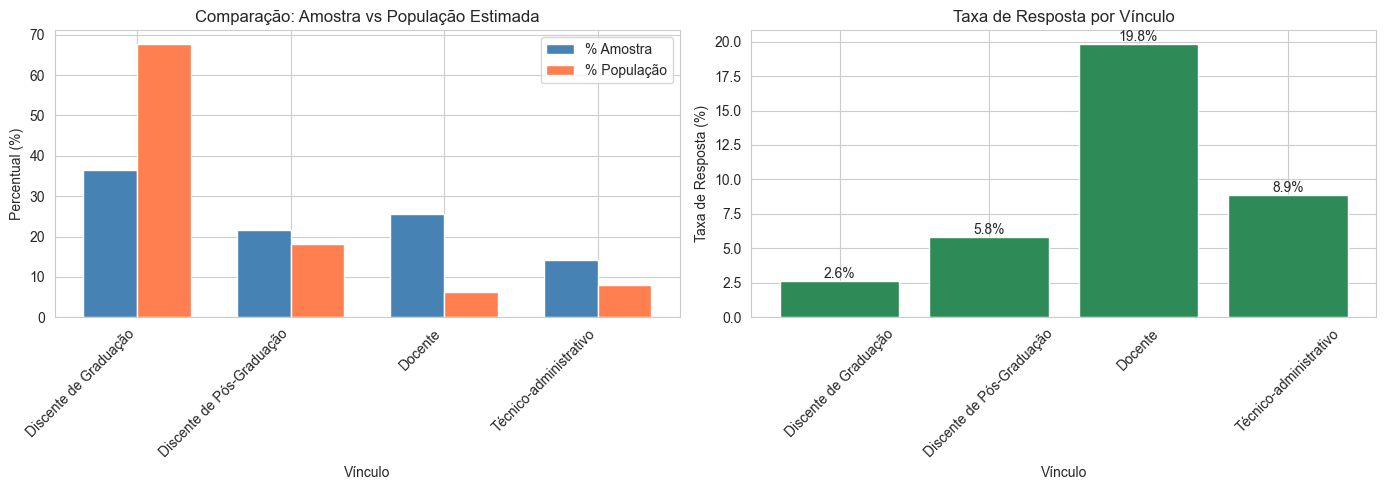


Gráfico salvo como: grafico_representatividade_etapa2.png


In [21]:
# Gráfico de comparação
df_comp_plot = df_comparacao[df_comparacao['Pop. Estimada'] != '-'].copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Comparação Amostra vs População
x = np.arange(len(df_comp_plot))
width = 0.35

bars1 = axes[0].bar(x - width/2, df_comp_plot['% Amostra'], width, label='% Amostra', color='steelblue')
bars2 = axes[0].bar(x + width/2, df_comp_plot['% População'], width, label='% População', color='coral')

axes[0].set_xlabel('Vínculo')
axes[0].set_ylabel('Percentual (%)')
axes[0].set_title('Comparação: Amostra vs População Estimada')
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_comp_plot['Vínculo'], rotation=45, ha='right')
axes[0].legend()

# Gráfico 2: Taxa de resposta por vínculo
df_comp_plot['Taxa Resposta (%)'] = pd.to_numeric(df_comp_plot['Taxa Resposta (%)'])
bars = axes[1].bar(df_comp_plot['Vínculo'], df_comp_plot['Taxa Resposta (%)'], color='seagreen')
axes[1].set_xlabel('Vínculo')
axes[1].set_ylabel('Taxa de Resposta (%)')
axes[1].set_title('Taxa de Resposta por Vínculo')
axes[1].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('grafico_representatividade_etapa2.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nGráfico salvo como: grafico_representatividade_etapa2.png")

---

## 10. Resumo e Estatísticas Descritivas

In [22]:
print("=" * 70)
print("RESUMO DO PERFIL DOS RESPONDENTES")
print("=" * 70)

print(f"""
📊 VISÃO GERAL DA AMOSTRA

   Total de respondentes: {len(df)}
   Período de coleta: {data_inicio.strftime('%d/%m/%Y')} a {data_fim.strftime('%d/%m/%Y')} ({duracao} dias)
   Média de respostas/dia: {len(df)/duracao:.1f}

📌 DISTRIBUIÇÃO POR VÍNCULO
""")

for _, row in freq_vinculo.iterrows():
    print(f"   • {row['Vínculo']}: {row['Frequência']} ({row['Percentual']}%)")

print(f"""
📌 DISTRIBUIÇÃO GEOGRÁFICA

   Centros/Unidades representados: {len(freq_centro)}
   Top 3 centros:""")

for _, row in freq_centro.head(3).iterrows():
    print(f"   • {row['Centro/Unidade']}: {row['Frequência']} ({row['Percentual']}%)")

print(f"""
📌 CURSOS (DISCENTES)

   Discentes que informaram curso: {len(df_cursos)} de {len(df_discentes)} ({len(df_cursos)/len(df_discentes)*100:.1f}%)
   Cursos únicos: {df_cursos['Curso'].nunique()}

📌 PADRÃO TEMPORAL

   Dia com mais respostas: {respostas_por_dia.loc[respostas_por_dia['Respostas'].idxmax(), 'Data'].strftime('%d/%m/%Y')} ({respostas_por_dia['Respostas'].max()} respostas)
   Horário de pico: {respostas_por_hora.idxmax()}h ({respostas_por_hora.max()} respostas)
""")

RESUMO DO PERFIL DOS RESPONDENTES

📊 VISÃO GERAL DA AMOSTRA

   Total de respondentes: 2164
   Período de coleta: 11/11/2025 a 01/12/2025 (21 dias)
   Média de respostas/dia: 103.0

📌 DISTRIBUIÇÃO POR VÍNCULO

   • Discente de Graduação: 792 (36.6%)
   • Docente: 555 (25.6%)
   • Discente de Pós-Graduação: 468 (21.6%)
   • Técnico-administrativo: 310 (14.3%)
   • Egresso: 39 (1.8%)

📌 DISTRIBUIÇÃO GEOGRÁFICA

   Centros/Unidades representados: 34
   Top 3 centros:
   • CAC - Centro de Artes e Comunicação: 285 (13.2%)
   • CTG - Centro de Tecnologia e Geociências: 268 (12.4%)
   • CAA - Centro Acadêmico do Agreste: 245 (11.3%)

📌 CURSOS (DISCENTES)

   Discentes que informaram curso: 1216 de 1260 (96.5%)
   Cursos únicos: 659

📌 PADRÃO TEMPORAL

   Dia com mais respostas: 18/11/2025 (518 respostas)
   Horário de pico: 9h (190 respostas)



---

## 11. Salvar Resultados

In [23]:
# Salvar todas as tabelas em um arquivo Excel com múltiplas abas
with pd.ExcelWriter(ARQUIVO_SAIDA_EXCEL, engine='openpyxl') as writer:
    freq_vinculo.to_excel(writer, sheet_name='Freq_Vinculo', index=False)
    freq_centro.to_excel(writer, sheet_name='Freq_Centro', index=False)
    tabela_cruzada.to_excel(writer, sheet_name='Cruzada_Centro_Vinculo')
    tabela_cruzada_pct.to_excel(writer, sheet_name='Cruzada_Percentual')
    freq_cursos.to_excel(writer, sheet_name='Top20_Cursos', index=False)
    respostas_por_dia.to_excel(writer, sheet_name='Respostas_por_Dia', index=False)
    df_comparacao.to_excel(writer, sheet_name='Representatividade', index=False)

print(f"✅ Tabelas salvas em: {ARQUIVO_SAIDA_EXCEL}")

✅ Tabelas salvas em: data/perfil_respondentes_etapa2.xlsx


In [24]:
# Combinar todos os gráficos em uma única imagem
from PIL import Image
import os

# Lista de gráficos gerados
graficos = [
    'grafico_vinculo_etapa2.png',
    'grafico_centro_etapa2.png',
    'grafico_heatmap_etapa2.png',
    'grafico_cursos_etapa2.png',
    'grafico_temporal_etapa2.png',
    'grafico_representatividade_etapa2.png'
]

print("Gráficos gerados:")
for g in graficos:
    if os.path.exists(g):
        print(f"  ✅ {g}")
    else:
        print(f"  ❌ {g} (não encontrado)")

Gráficos gerados:
  ✅ grafico_vinculo_etapa2.png
  ✅ grafico_centro_etapa2.png
  ✅ grafico_heatmap_etapa2.png
  ✅ grafico_cursos_etapa2.png
  ✅ grafico_temporal_etapa2.png
  ✅ grafico_representatividade_etapa2.png


In [25]:
# Gerar relatório em Markdown
relatorio = f"""# RELATÓRIO DO PERFIL DOS RESPONDENTES
## Etapa 2 — Consulta à Comunidade UFPE sobre o Uso de IA

**Data de execução:** {datetime.now().strftime("%d/%m/%Y às %H:%M")}

---

## 1. VISÃO GERAL DA AMOSTRA

| Métrica | Valor |
|---------|-------|
| Total de respondentes | {len(df)} |
| Período de coleta | {data_inicio.strftime('%d/%m/%Y')} a {data_fim.strftime('%d/%m/%Y')} |
| Duração | {duracao} dias |
| Média de respostas/dia | {len(df)/duracao:.1f} |

---

## 2. DISTRIBUIÇÃO POR VÍNCULO INSTITUCIONAL

| Vínculo | Frequência | Percentual |
|---------|------------|------------|
"""

for _, row in freq_vinculo.iterrows():
    relatorio += f"| {row['Vínculo']} | {row['Frequência']} | {row['Percentual']}% |\n"

relatorio += f"""
---

## 3. DISTRIBUIÇÃO POR CENTRO/UNIDADE

Total de centros/unidades representados: **{len(freq_centro)}**

### Top 10 Centros/Unidades

| Centro/Unidade | Frequência | Percentual |
|----------------|------------|------------|
"""

for _, row in freq_centro.head(10).iterrows():
    relatorio += f"| {row['Centro/Unidade']} | {row['Frequência']} | {row['Percentual']}% |\n"

relatorio += f"""
---

## 4. ANÁLISE TEMPORAL

| Métrica | Valor |
|---------|-------|
| Dia com mais respostas | {respostas_por_dia.loc[respostas_por_dia['Respostas'].idxmax(), 'Data'].strftime('%d/%m/%Y')} ({respostas_por_dia['Respostas'].max()} respostas) |
| Horário de pico | {respostas_por_hora.idxmax()}h ({respostas_por_hora.max()} respostas) |

---

## 5. ANÁLISE DE REPRESENTATIVIDADE

⚠️ **Nota:** Os dados populacionais são estimativas. Ajuste conforme dados oficiais da UFPE.

| Vínculo | N Amostra | % Amostra | Pop. Estimada | % População | Taxa Resposta |
|---------|-----------|-----------|---------------|-------------|---------------|
"""

for _, row in df_comparacao.iterrows():
    relatorio += f"| {row['Vínculo']} | {row['N Amostra']} | {row['% Amostra']}% | {row['Pop. Estimada']} | {row['% População']}% | {row['Taxa Resposta (%)']}% |\n"

relatorio += f"""
---

## 6. PRINCIPAIS OBSERVAÇÕES

1. **Composição da amostra:** A maioria dos respondentes são discentes de graduação ({freq_vinculo.iloc[0]['Percentual']}%), seguidos por docentes ({freq_vinculo.iloc[1]['Percentual']}%).

2. **Cobertura geográfica:** Todos os {len(freq_centro)} centros/unidades da UFPE estão representados na amostra.

3. **Representatividade:** Docentes apresentam a maior taxa de resposta proporcional à população, enquanto discentes de graduação são o grupo mais numeroso em termos absolutos.

4. **Padrão temporal:** As respostas foram coletadas ao longo de {duracao} dias, com pico de atividade no horário das {respostas_por_hora.idxmax()}h.

---

## 7. ARQUIVOS GERADOS

| Arquivo | Descrição |
|---------|----------|
| `{ARQUIVO_SAIDA_EXCEL}` | Tabelas de frequência e cruzamentos |
| `grafico_vinculo_etapa2.png` | Distribuição por vínculo |
| `grafico_centro_etapa2.png` | Distribuição por centro |
| `grafico_heatmap_etapa2.png` | Heatmap vínculo × centro |
| `grafico_cursos_etapa2.png` | Top 20 cursos |
| `grafico_temporal_etapa2.png` | Análise temporal |
| `grafico_representatividade_etapa2.png` | Comparação com população |

---

*Relatório gerado automaticamente em {datetime.now().strftime("%d/%m/%Y às %H:%M")}*
"""

# Salvar relatório
with open(ARQUIVO_SAIDA_RELATORIO, "w", encoding='utf-8') as f:
    f.write(relatorio)

print(f"✅ Relatório salvo em: {ARQUIVO_SAIDA_RELATORIO}")

✅ Relatório salvo em: data/relatorio_perfil_etapa2.md


In [26]:
print("\n" + "=" * 70)
print("ETAPA 2 CONCLUÍDA COM SUCESSO!")
print("=" * 70)
print(f"""
📁 ARQUIVOS GERADOS:

   📊 Dados:
      • {ARQUIVO_SAIDA_EXCEL}

   📈 Gráficos:
      • grafico_vinculo_etapa2.png
      • grafico_centro_etapa2.png
      • grafico_heatmap_etapa2.png
      • grafico_cursos_etapa2.png
      • grafico_temporal_etapa2.png
      • grafico_representatividade_etapa2.png

   📝 Relatório:
      • {ARQUIVO_SAIDA_RELATORIO}

▶️  PRÓXIMA ETAPA: Etapa 3 - Análise das Variáveis Categóricas Fechadas
""")


ETAPA 2 CONCLUÍDA COM SUCESSO!

📁 ARQUIVOS GERADOS:

   📊 Dados:
      • data/perfil_respondentes_etapa2.xlsx

   📈 Gráficos:
      • grafico_vinculo_etapa2.png
      • grafico_centro_etapa2.png
      • grafico_heatmap_etapa2.png
      • grafico_cursos_etapa2.png
      • grafico_temporal_etapa2.png
      • grafico_representatividade_etapa2.png

   📝 Relatório:
      • data/relatorio_perfil_etapa2.md

▶️  PRÓXIMA ETAPA: Etapa 3 - Análise das Variáveis Categóricas Fechadas



---

## Resumo dos Arquivos

### Entrada
| Arquivo | Origem |
|---------|--------|
| `dados_limpos_etapa1.xlsx` | Etapa 1 |

### Saída
| Arquivo | Descrição |
|---------|----------|
| `perfil_respondentes_etapa2.xlsx` | Tabelas de frequência e cruzamentos |
| `grafico_vinculo_etapa2.png` | Distribuição por vínculo institucional |
| `grafico_centro_etapa2.png` | Distribuição por centro/unidade |
| `grafico_heatmap_etapa2.png` | Heatmap vínculo × centro |
| `grafico_cursos_etapa2.png` | Top 20 cursos (discentes) |
| `grafico_temporal_etapa2.png` | Análise temporal das respostas |
| `grafico_representatividade_etapa2.png` | Comparação amostra vs população |
| `relatorio_perfil_etapa2.md` | Relatório descritivo completo |

---

**Próxima etapa:** Etapa 3 - Análise das Variáveis Categóricas Fechadas